# YoungDevInterns_Data Analyst_Tasks

=== TASK 1: DATA CLEANING ===
✔ Dataset loaded successfully with 418 rows
✔ Cleaning completed successfully


,PassengerId,Survived
0,892,0
1,893,1
2,894,0



=== TASK 2: DATA VISUALIZATION ===


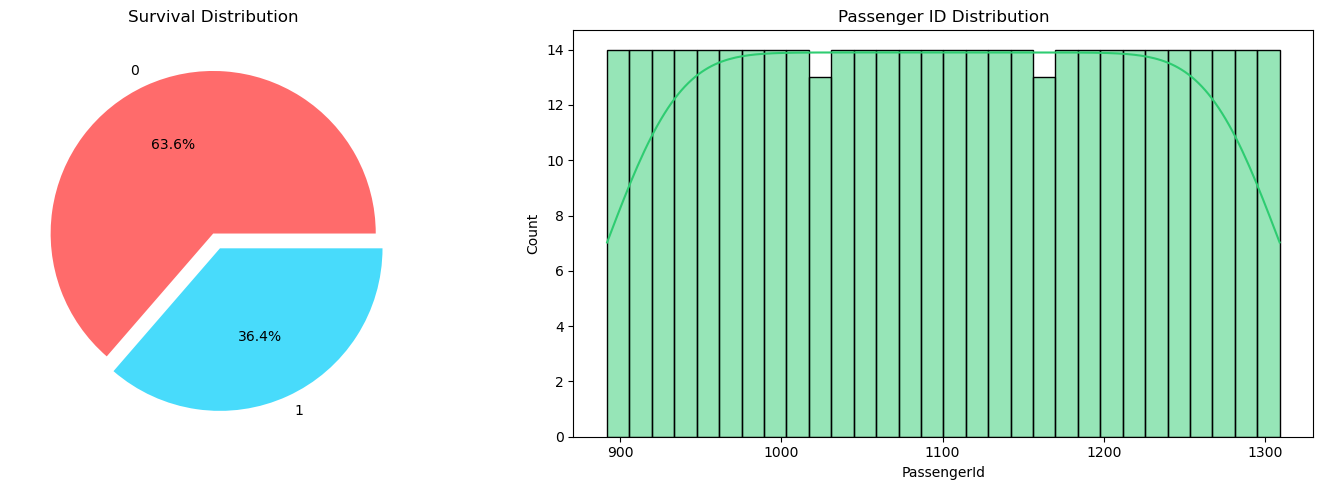

✔ Visualizations displayed

=== TASK 3: DATA ANALYSIS ===
• Total passengers: 418
• Unique PassengerIds: 418
• Survival rate: 36.4%

ℹ For extended analysis, add 'train.csv' to your Jupyter home directory



Save cleaned data? (y/n):  y


✔ Saved as 'cleaned_gender_submission.csv' in Jupyter home


In [6]:
# Titanic Gender Submission Analysis
# All-in-One Solution for Jupyter Notebook

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# =============================================
# TASK 1: DATA CLEANING
# =============================================
print("=== TASK 1: DATA CLEANING ===")

# Load the data
try:
    df = pd.read_csv('gender_submission.csv')
    print(f"✔ Dataset loaded successfully with {len(df)} rows")
except FileNotFoundError:
    print("❌ Error: 'gender_submission.csv' not found in Jupyter home directory")
    print("Please ensure the file is in the same folder as this notebook")

# Clean the data
if 'df' in locals():
    # Remove duplicates
    initial_count = len(df)
    df = df.drop_duplicates(subset=['PassengerId'])
    dup_count = initial_count - len(df)
    if dup_count > 0:
        print(f"⚠ Removed {dup_count} duplicate PassengerId entries")
    
    # Validate Survived values (must be 0 or 1)
    invalid_survived = (~df['Survived'].isin([0, 1])).sum()
    if invalid_survived > 0:
        df['Survived'] = df['Survived'].clip(0, 1)
        print(f"⚠ Corrected {invalid_survived} invalid Survived values")
    
    print("✔ Cleaning completed successfully")
    display(df.head(3))  # Show sample of cleaned data

# =============================================
# TASK 2: DATA VISUALIZATION
# =============================================
print("\n=== TASK 2: DATA VISUALIZATION ===")

if 'df' in locals():
    plt.figure(figsize=(15, 5))
    
    # Plot 1: Survival distribution
    plt.subplot(1, 2, 1)
    df['Survived'].value_counts().plot(
        kind='pie',
        autopct='%1.1f%%',
        colors=['#ff6b6b', '#48dbfb'],
        explode=[0, 0.1],
        title='Survival Distribution'
    )
    plt.ylabel('')
    
    # Plot 2: Passenger ID distribution
    plt.subplot(1, 2, 2)
    sns.histplot(df['PassengerId'], bins=30, kde=True, color='#2ecc71')
    plt.title('Passenger ID Distribution')
    
    plt.tight_layout()
    plt.show()
    print("✔ Visualizations displayed")

# =============================================
# TASK 3: DATA ANALYSIS
# =============================================
print("\n=== TASK 3: DATA ANALYSIS ===")

if 'df' in locals():
    # Basic statistics
    survival_rate = df['Survived'].mean() * 100
    unique_passengers = df['PassengerId'].nunique()
    
    print(f"• Total passengers: {len(df)}")
    print(f"• Unique PassengerIds: {unique_passengers}")
    print(f"• Survival rate: {survival_rate:.1f}%")
    
    # Advanced analysis (if main Titanic data available)
    try:
        titanic_df = pd.read_csv('train.csv')  # Try loading main dataset
        merged = pd.merge(titanic_df, df, on='PassengerId', how='left')
        accuracy = (merged['Survived_y'] == merged['Survived_x']).mean() * 100
        print(f"\nExtended Analysis (with main Titanic data):")
        print(f"• Prediction accuracy: {accuracy:.1f}%")
    except FileNotFoundError:
        print("\nℹ For extended analysis, add 'train.csv' to your Jupyter home directory")

# =============================================
# SAVE CLEANED DATA (OPTIONAL)
# =============================================
if 'df' in locals():
    save_choice = input("\nSave cleaned data? (y/n): ").lower()
    if save_choice == 'y':
        df.to_csv('cleaned_gender_submission.csv', index=False)
        print("✔ Saved as 'cleaned_gender_submission.csv' in Jupyter home")
    else:
        print("Cleaned data not saved")